
# Statistics Assignment #1: Nick Crawford

### Readme
> This assignment is written in Python using the data analysis libaries NumPy and Pandas.
> This document is static and cannot be edited. To run this interactively, 
> you can download the .ipynb file and upload it onto https://tmpnb.org/
> From there you can interact with the data and the functions.
> You can also run the code natively with the anaconda package

In [2]:
# Import the necessary libaries for data analysis
%matplotlib inline
import pandas as pd
import seaborn as sns

# Convert timestamp columns from string into python datetime objects.
data['ts_min'] = pd.to_datetime(data['ts_min'])
data['ts_max'] = pd.to_datetime(data['ts_max'])
data['ds'] = pd.to_datetime(data['ds'])

# Function to read csv with choosen delimiter 
data = pd.read_csv('Airbnb_user_sessions.csv', delimiter="|")

In [35]:
data.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


## Question 1
1) Determine how many unique users are represented in this sample.

In [37]:
# The data table is seperated into a list of groups of data, based on the column name "id_visitor".
# The size of this list of groups represents the number of unique users in the sample.

total_rows = len(data.index)
unique_users = len(data.groupby("id_visitor"))

print("Total Rows: {} \nUnique Users: {}".format(total_rows, unique_users))

Total Rows: 7756 
Unique Users: 630


## Question 2
2) Determine the proportion of sessions that result in a booking request being sent.

In [38]:
# Find all rows when 'next_sent_booking_request' column was greater than 0 (True).

total_booking_request = len(data.loc[data['next_sent_booking_request'] > 0])
booking_percent = (total_booking_request/float(total_rows))*100

print("Number of booking requests: {} \nPercentage of requests that result in booking: {:.2f}%" \
    .format(total_booking_request, booking_percent))

Number of booking requests: 138 
Percentage of requests that result in booking: 1.78%


## Question 3
3) Using the “dim_device_app_combo” data:
- Determine the proportion of sessions where an iPad was the device employed by the user. 
- Construct a histogram showing the frequency distribution of devices employed by users.

In [39]:
# Look for all rows whose "dim_device_app_combo" col contains the word iPad.

total_ipads = len(data.loc[data['dim_device_app_combo'].str.contains("iPad")])

print("Number of iPads used: {} \nPercentage of devices that were ipads: {:.2f}%" \
    .format(total_ipads, (total_ipads/float(total_rows))*100))

Number of iPads used: 534 
Percentage of devices that were ipads: 6.88%


In [2]:
#frequency distribution
graph = (data.groupby('dim_device_app_combo').size()).sort_values()
print(graph)

dim_device_app_combo
Android Tablet - Moweb         2
Android Tablet - Android      14
Android Phone - Moweb         72
Android Phone - Web          112
iPad - iOS                   121
Unknown - Moweb              122
Other - Other                267
Android Tablet - Web         299
Desktop - Firefox            327
iPad - Web                   413
Desktop - IE                 429
iPhone - Moweb               429
Desktop - Safari             443
Android Phone - Android      451
iPhone - Web                 944
Desktop - Chrome            1181
iPhone - iOS                2130
dtype: int64


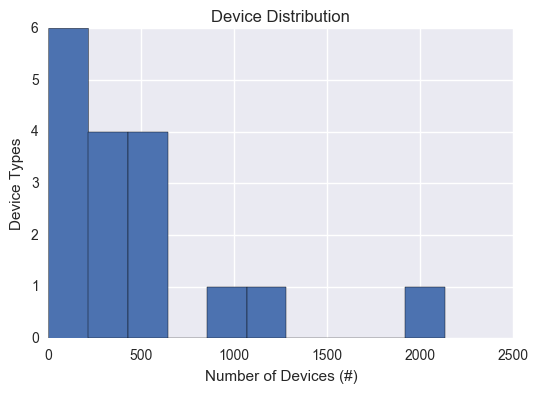

In [41]:
plot1 = graph.hist()
plot1.set_title("Device Distribution")
plot1.set_xlabel("Number of Devices (#)")
plot1.set_ylabel("Device Types")

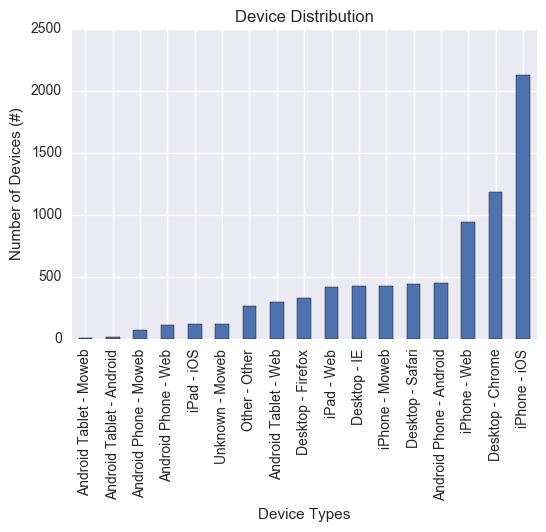

In [43]:
# bar chat is also helpful for visualizing

plot2 = graph.plot.bar()
plot2.set_title("Device Distribution")
plot2.set_xlabel("Device Types")
plot2.set_ylabel("Number of Devices (#)")

## Question 4
4) Using the “ts_min” and “ts_max” data:
- Determine the duration of each session in minutes. 
- Describe the method used, including any data manipulation or filtering.
- Compute the mean, median, mode, and the 90th percentile of the session durations in minutes. 
- Compute the standard deviation and variance of the session durations in minutes.
- Construct a histogram showing the frequency distribution of the session durations in minutes.

In [44]:
# Describe method:
# in order to accomplish this, I converted the string columns "ts_max" and "ts_min", in the csv file
# to a python datetime type. Python datetime objects support addition and subtraction of times,
# so it was as easy as subtracting the two columns

session_durations = data['ts_max'] - data['ts_min']

# convert time delta into seconds, then divide number into minutes

def convertToMinutes(duration):
    return duration.seconds/60

minutes = session_durations.apply(convertToMinutes)
print ("first 30 records\n")
for i in range(30):
    print("{:.1f} minutes".format(minutes[i]))

first 30 records

23.0 minutes
15.6 minutes
3.4 minutes
10.5 minutes
0.0 minutes
0.1 minutes
1.2 minutes
4.5 minutes
0.6 minutes
27.6 minutes
13.2 minutes
26.4 minutes
0.1 minutes
3.1 minutes
0.1 minutes
2.8 minutes
9.2 minutes
0.0 minutes
45.6 minutes
0.2 minutes
0.1 minutes
18.9 minutes
8.7 minutes
22.2 minutes
177.9 minutes
3.6 minutes
2.4 minutes
27.1 minutes
19.1 minutes
146.5 minutes


In [45]:
# duration calculations

mean = minutes.mean()
median = minutes.median()
percentile = minutes.quantile(0.9)
mode = minutes.mode()
print ("Mean: {:.1f} \nMedian: {:.1f} \n90th Percentile: {:.1f} \nMode: {}".format(mean,median,percentile,mode))

Mean: 10.7 
Median: 1.5 
90th Percentile: 29.3 
Mode: 0    0.0
dtype: float64


In [46]:
# standard deviation and variance of the session durations in minutes

std_dev = minutes.std()
variance= minutes.var()
print ("Standard Deviation: {:.1f} \nVariance: {:.2f}".format(std_dev, variance))

Standard Deviation: 27.3 
Variance: 745.25


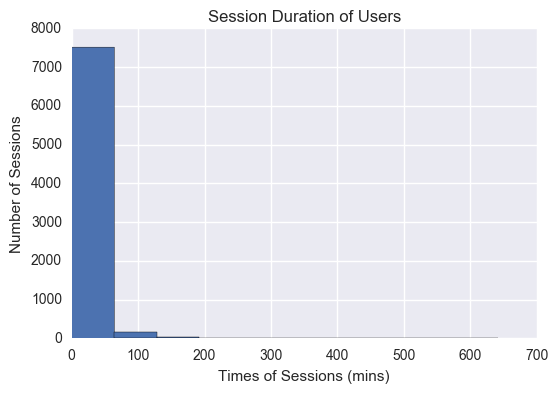

In [47]:
# create histogram

plot3 = minutes.hist()
plot3.set_title("Session Duration of Users")
plot3.set_xlabel("Times of Sessions (mins)")
plot3.set_ylabel("Number of Sessions")

## Question 5
5) Using the “ds” data:
- Determine the day of the week where users are most active.
- Summarize user activity for each day of the week using a visualization of the data.

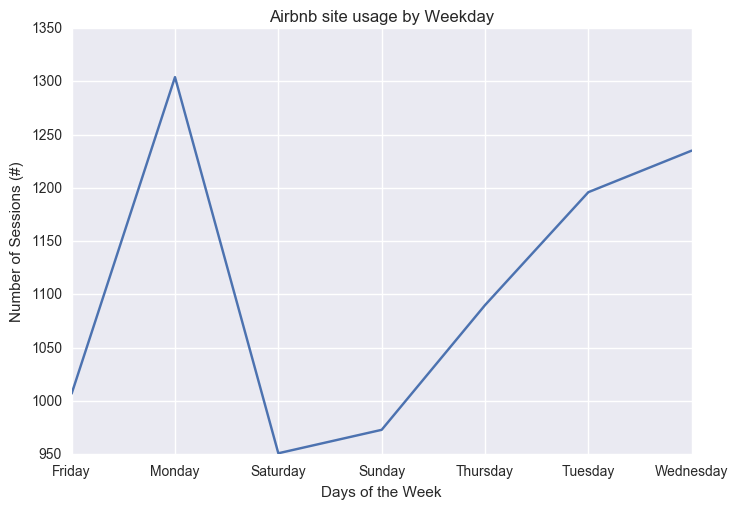

In [59]:
# Create a function, and use .apply() to call that function
# to change each element of the panda series/dataframe 

def getWeekday(date):
    day = date.weekday()
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    elif day == 6:
        return "Sunday"
        
# create a series that contains datetimes converted into weekday strings
# monday is 0, sunday is 6

weekdays = data['ds'].apply(getWeekday)
weekdays_grouped = weekdays.groupby(weekdays).size()

#weekdays_grouped = pd.Categorical(weekdays_grouped.iloc[0], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plot4 = weekdays_grouped.plot("line")
plot4.set_title("Airbnb site usage by Weekday")
plot4.set_xlabel("Days of the Week")
plot4.set_ylabel("Number of Sessions (#)")

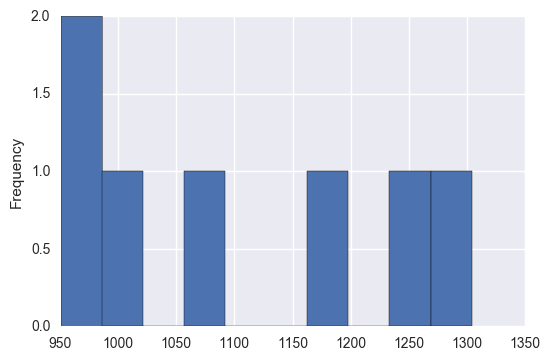

In [51]:
weekdays_grouped.plot("hist")

In [52]:
print ("Users are most active on Mondays")

Users are most active on Mondays
